# Introduction to Python and Numpy
## Part Two - Linear Algebra Review
#### By Jonathan L. Moran (jo6155mo-s@student.lu.se)
From the EDAN95 - Applied Machine Learning course given at Lunds Tekniska Högskola (LTH) | Ht2 2019.

## Objectives
In this set of notebooks you will
*  Get a hands-on introduction to Python
*  Refresh your knowledge on linear algebra
*  Know the main functions of numpy

## Implementation task
_2. Run the Jupyter notebook on linear algebra from **Machine Learning and Deep Learning in Python using Scikit-learn, Keras and TensorFlow 2** by Géron available at https://github.com/ageron/handson-ml2 and entitled `math_linear_algebra.ipynb`._

### Vectors
#### Definition
_A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called scalars. Each scalar corresponds to the magnitude of the vector with regards to each dimension.
For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity may be represented by the following vector:_


**velocity** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

_Note: by convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as ${meters\_per\_second} = 5026$._

#### Purpose
_Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:_

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

_This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.
Based on this vector our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:_

**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

#### Vectors in Python
_In Python, a vector can be represented in many ways, the simplest being a regular Python list of numbers:_

In [1]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

_Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's ndarray, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out the [NumPy tutorial](https://render.githubusercontent.com/view/2019-11-08-Introduction-Part-Three.ipynb)). For example:_

In [2]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

_The size of a vector can be obtained using the size attribute:_

In [3]:
video.size

4

#### Plotting vectors
_To plot vectors we will use matplotlib, so let's start by importing it:_

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

#### 2D vectors
_Let's create a couple very simple 2D vectors to plot:_

In [5]:
u = np.array([2, 5])
v = np.array([3, 1])

_These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:_

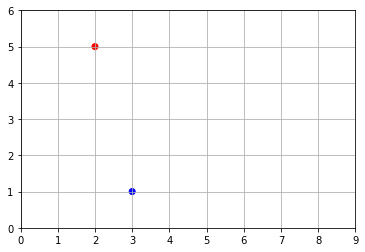

In [6]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

_Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows:_

In [7]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

_Now let's draw the vectors **u** and **v** as arrows:_

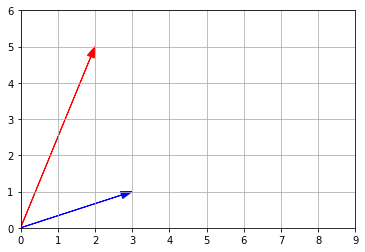

In [8]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

#### 3D vectors
_Plotting 3D vectors is also relatively straightforward. First let's create two 3D vectors:_

In [9]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

_Now let's plot them using matplotlib's `Axes3D`_

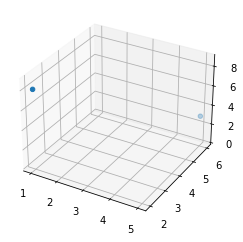

In [10]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

_It is a bit hard to visualize exactly where in space these two points are, so let's add vertical lines. We'll create a small convenience function to plot a list of 3d vectors with vertical lines attached:_

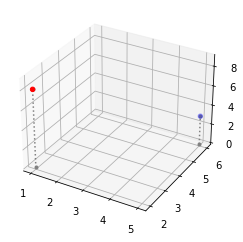

In [11]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

#### Norm
_The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:_

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

_We could implement this easily in pure Python, recalling that $\sqrt x = x^{\frac{1}{2}}$_

In [12]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

_However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (Linear Algebra) module:_

In [13]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

_Let's plot a little diagram to confirm that the length of vector $\textbf{v}$ is indeed $\approx5.4$:_

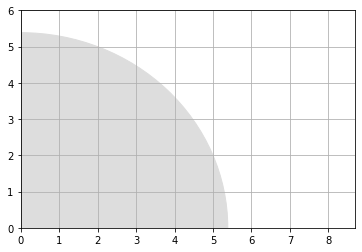

In [14]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

#### Addition
_Vectors of same size can be added together. Addition is performed $\textit{elementwise}$:_

In [15]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

_Let's look at what vector addition looks like graphically:_

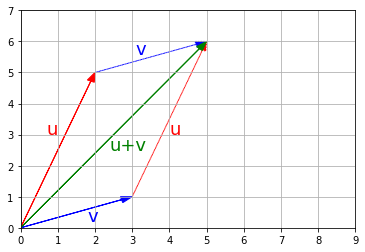

In [16]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

_Vector addition is commutative, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ then $\textbf{v}$ leads to the same point as following $\textbf{v}$ then $\textbf{u}$._

_Vector addition is also associative, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$._

_If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called a [geometric translation](https://en.wikipedia.org/wiki/Translation_\(geometry\)):_

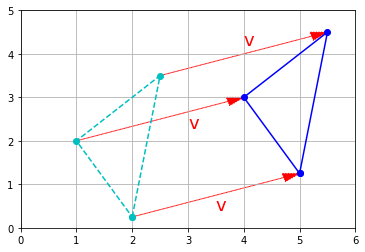

In [17]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

_Finally, subtracting a vector is like adding the opposite vector._

#### Multiplication by a scalar
_Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number, for example:_

In [18]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

_Graphically, scalar multiplication results in changing the scale of a figure, hence the name scalar. The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. For example, let's scale up by a factor of `k = 2.5`:_

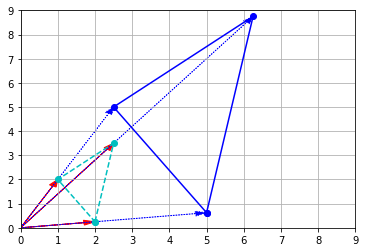

In [19]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

_As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):_

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

_Scalar multiplication is **commutative**:_ $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

_It is also **associative**:_ $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

_Finally, it is **distributive** over addition of vectors:_ $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

#### Zero, unit and normalized vectors
* _A **zero-vector** is a vector full of 0s._
* _A **unit vector** is a vector with a norm equal to 1._
* _The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$_

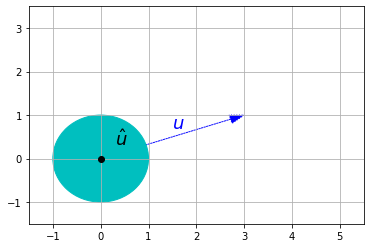

In [20]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

#### Dot product
##### Definition
_The dot product (also called scalar product or inner product in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$ or $(\textbf{u}|\textbf{v})$, and it is defined as:_

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

_where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$._

_Another way to calculate the dot product is:_

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

##### In Python
_The dot product is pretty simple to implement:_

In [21]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

_But a much more efficient implementation is provided by NumPy with the `dot` function_

In [22]:
np.dot(u,v)

11

_Equivalently, you can use the dot method of `ndarrays`:_

In [23]:
u.dot(v)

11

_**Caution**: the `*` operator will perform an elementwise multiplication, NOT a dot product:_

In [24]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

##### Main properties
* _The dot product is **commutative**:_ $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* _The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector._
* _This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined._
* _However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$_
* _Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$._

##### Calculating the angle between vectors
_One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:_

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

_Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal._

_Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):_

In [25]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


_Note: due to small floating point errors, cos_theta may be very slightly outside of the $[-1, 1]$ interval, which would make arccos fail. This is why we clipped the value within the range, using NumPy's clip function._

##### Projecting a point onto an axis
_The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:_

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

_Which is equivalent to:_

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

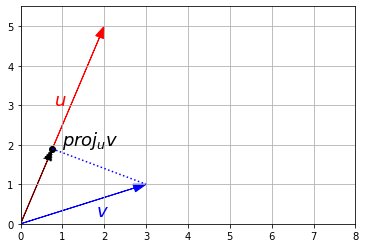

In [26]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

### Matrices
_A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:_

$$\begin{bmatrix} 10  \ 20 \ 30 \\ 40 \ 50 \ 60 \end{bmatrix}$$

_You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors._

_Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling._

#### Matrices in Python
_In Python, a matrix can be represented in various ways. The simplest is just a list of Python lists:_

In [27]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

_A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations:_

In [28]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

_By convention matrices generally have uppercase names, such as $A$._

_In the rest of this tutorial, we will assume that we are using NumPy arrays (type ndarray) to represent matrices._


#### Size
_The size of a matrix is defined by its number of rows and number of columns. It is noted $rows \times columns$. For example, the matrix $A$ above is an example of a $2 \times 3$ matrix: 2 rows, 3 columns. Caution: a $3 \times 2$ matrix would have 3 rows and 2 columns._

_To get a matrix's size in NumPy:_

In [29]:
A.shape

(2, 3)

_**Caution**: the size attribute represents the number of elements in the ndarray, not the matrix's size:_

In [30]:
A.size

6

#### Element indexing
_The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$, but there is no standard notation, so people often prefer to explicitely name the elements, like this: "let $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$". This means that $X$ is equal to:_

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

_However in this notebook we will use the $X_{i,j}$ notation, as it matches fairly well NumPy's notation. Note that in math indices generally start at 1, but in programming they usually start at 0. So to access $A_{2,3}$ programmatically, we need to write this:_

In [31]:
A[1,2]  # 2nd row, 3rd column

60

_The $i^{th}$ row vector is sometimes noted $M_i$ or $M_{i,*}$, but again there is no standard notation so people often prefer to explicitely define their own names, for example: "let x$_{i}$ be the $i^{th}$ row vector of matrix $X$". We will use the $M_{i,*}$, for the same reason as above. For example, to access $A_{2,*}$ (ie. $A$'s 2nd row vector):_

In [32]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

_Similarly, the $j^{th}$ column vector is sometimes noted $M^j$ or $M_{*,j}$, but there is no standard notation. We will use $M_{*,j}$. For example, to access $A_{*,3}$ (ie. $A$'s 3rd column vector):_

In [33]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

_Note that the result is actually a one-dimensional NumPy array: there is no such thing as a vertical or horizontal one-dimensional array. If you need to actually represent a row vector as a one-row matrix (ie. a 2D NumPy array), or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example:_

In [34]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

In [35]:
A[:, 2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix

array([[30],
       [60]])

#### Square, triangular, diagonal and identity matrices
_A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:_
$$\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}$$

_An **upper triangular matrix** is a special kind of square matrix where all the elements below the main diagonal (top-left to bottom-right) are zero, for example:_
$$\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}$$

_Similarly, a **lower triangular matrix** is a square matrix where all elements above the main diagonal are zero, for example:_
$$\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}$$

_A **triangular matrix** is one that is either lower triangular or upper triangular.
_A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:_
$$\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}$$

_You can construct a diagonal matrix using NumPy's `diag` function:_

In [36]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

_If you pass a matrix to the `diag` function, it will happily extract the diagonal values:_

In [37]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

_Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:_
$$\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}$$

_Numpy's `eye` function returns the identity matrix of the desired size:_

In [38]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

_The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the identity matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below._

#### Adding matrices
_If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. Addition is performed elementwise: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$_

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

_For example, let's create a $2 \times 3$ matrix $B$ and compute $A + B$:_

In [39]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [41]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

_**Addition is commutative**, meaning that $A + B = B + A$:_

In [42]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

_**It is also associative**, meaning that $A + (B + C) = (A + B) + C$:_

In [43]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [44]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

#### Scalar multiplication
_A matrix $M$ can be multiplied by a scalar $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:_

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$



_A more concise way of writing this is:_

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$



_In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:_

In [45]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

_Scalar multiplication is also defined on the right hand side, and gives the same result: $M \lambda = \lambda M$. For example:_

In [46]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

_This makes scalar multiplication **commutative**._

_It is also **associative**, meaning that $\alpha (\beta M) = (\alpha \times \beta) M$, where $\alpha$ and $\beta$ are scalars. For example:_

In [47]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [48]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

_Finally, it is **distributive over addition** of matrices, meaning that $\lambda (Q + R) = \lambda Q + \lambda R$:_

In [49]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [50]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

#### Matrix multiplication
_So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved._

_A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:_

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

_The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$._

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

_You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:_

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

_So we can rewrite $P$ more concisely as:_

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$

_Let's multiply two matrices in NumPy, using ndarray's `dot` method:_

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [51]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

_Let's check this result by looking at one element, just to be sure: looking at $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:_

In [52]:
40*5 + 50*17 + 60*31

2910

In [53]:
E[1,2]  # row 2, column 3

2910

_Looks good! You can check the other elements until you get used to the algorithm.
We multiplied a $2 \times 3$ matrix by a $3 \times 4$ matrix, so the result is a $2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiply $D$ by $A$, we get an error because D has 4 columns while A has 2 rows:_

In [54]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


_This illustrates the fact that **matrix multiplication is NOT commutative**: in general $QR ≠ RQ$
In fact, $QR$ and $RQ$ are only both defined if $Q$ has size $m \times n$ and $R$ has size $n \times m$._

_Let's look at an example where both are defined and show that they are (in general) NOT equal:_

In [55]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [56]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

_On the other hand, matrix multiplication is **associative**, meaning that $Q(RS) = (QR)S$. Let's create a $4 \times 5$ matrix $G$ to illustrate this:_

In [57]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [58]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

_It is also distributive over addition of matrices, meaning that $(Q + R)S = QS + RS$. For example:_

In [59]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [60]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

_The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:_

$M I_n = I_m M = M$

_This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):_

$MI = IM = M$

_For example:_

In [61]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [62]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

_**Caution**: NumPy's `*` operator performs elementwise multiplication, NOT a matrix multiplication:_

In [63]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

##### The @ infix operator
_Python 3.5 introduced the `@` infix operator for matrix multiplication, and NumPy 1.10 added support for it. If you are using Python 3.5+ and NumPy 1.10+, you can simply write `A @ D` instead of `A.dot(D)`, making your code much more readable (but less portable). This operator also works for vector dot products._

In [64]:
import sys
print("Python version: {}.{}.{}".format(*sys.version_info))
print("Numpy version:", np.version.version)

# Uncomment the following line if your Python version is ≥3.5
# and your NumPy version is ≥1.10:

A @ D

Python version: 3.8.5
Numpy version: 1.19.2


array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

_Note: Q @ R is actually equivalent to `Q.__matmul__(R)` which is implemented by NumPy as `np.matmul(Q, R)`, not as `Q.dot(R)`. The main difference is that `matmul` does not support scalar multiplication, while `dot` does, so you can write `Q.dot(3)`, which is equivalent to `Q * 3`, but you cannot write `Q @ 3` ([more details](http://stackoverflow.com/a/34142617/38626))._

#### Matrix transpose
_The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:_
$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

_In other words, ($A^T)_{i,j}$ = $A_{j,i}$_

_Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix._

_Note: there are a few other notations, such as $M^t$, $M′$, or ${^t}M$._

_In NumPy, a matrix's transpose can be obtained simply using the T attribute:_

In [65]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [66]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

_As you might expect, transposing a matrix twice returns the original matrix:_

In [67]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

_Transposition is distributive over addition of matrices, meaning that $(Q + R)^T = Q^T + R^T$. For example:_

In [68]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [69]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

_Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$. Note that the order is reversed. For example:_

In [70]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [71]:

D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

_A **symmetric matrix** $M$ is defined as a matrix that is equal to its transpose: $M^T = M$. This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:_
$$\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}$$

_The product of a matrix by its transpose is always a symmetric matrix, for example:_

In [72]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

#### Converting 1D arrays to 2D arrays in NumPy
_As we mentionned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:_

In [73]:
u

array([2, 5])

In [74]:
u.T

array([2, 5])

_We want to convert $\textbf{u}$ into a row vector before transposing it. There are a few ways to do this:_

In [75]:
u_row = np.array([u])
u_row

array([[2, 5]])

_Notice the extra square brackets: this is a 2D array with just one row (ie. a 1x2 matrix). In other words it really is a **row vector**._

In [76]:
u[np.newaxis, :]

array([[2, 5]])

_This is equivalent, but a little less explicit._

In [77]:
u[None]

array([[2, 5]])

_This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that np.newaxis is actually equal to None, so this is equivalent to the previous version._

_Ok, now let's transpose our row vector:_

In [78]:
u_row.T

array([[2],
       [5]])

_Great! We now have a nice **column vector**._

_Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:_

In [79]:
u[:, np.newaxis]

array([[2],
       [5]])

#### Plotting a matrix

_We have already seen that vectors can be represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix P and plot it as points:_

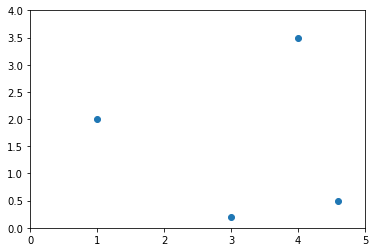

In [80]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

_Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice._

_Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:_

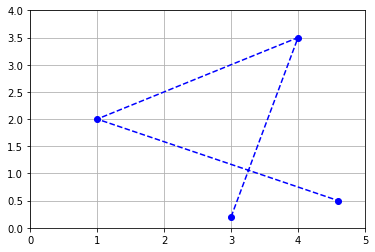

In [81]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

_Or you can represent it as a polygon: `matplotlib`'s Polygon class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:_

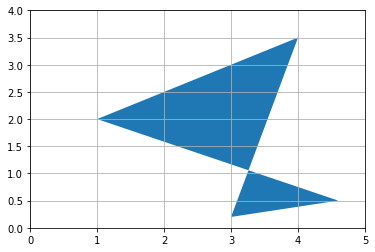

In [82]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

#### Geometric applications of matrix operations
_We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate._

_Similarly, matrix operations have very useful geometric applications._

##### Addition = multiple geometric translations

_First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:_

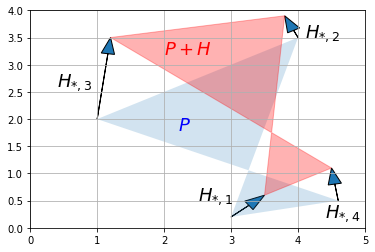

In [83]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

_If we add a matrix full of identical vectors, we get a simple geometric translation:_

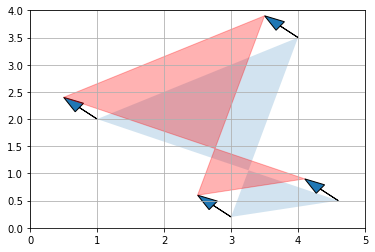

In [84]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

_Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called $\textit{broadcasting}$ and is explained in further details in the [NumPy tutorial](https://render.githubusercontent.com/view/2019-11-08-Introduction-Part-Three.ipynb). We could have obtained the same result as above with:_

In [85]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

##### Scalar multiplication
_Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):_

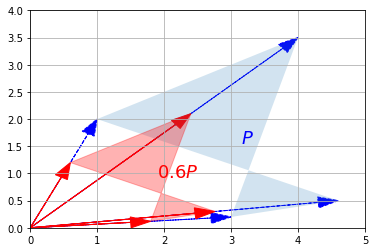

In [86]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

##### Matrix multiplication – Projection onto an axis
_Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.
Let's start simple, by defining a $1 \times 2$ matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector._

In [87]:
U = np.array([[1, 0]])

_Now let's look at the dot product $U \cdot P$:_

In [88]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

_These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis:_

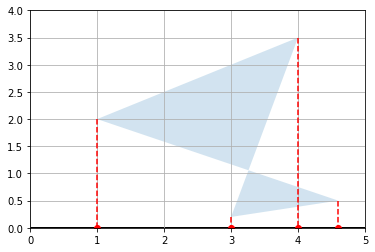

In [89]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

_We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 30° angle above the horizontal axis:_

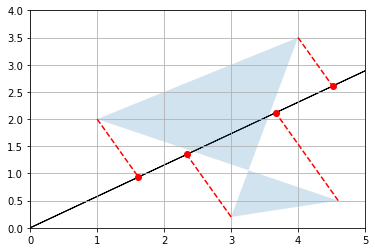

In [90]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

_Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis._

##### Matrix multiplication – Rotation
_Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:_

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [91]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

_Let's look at the product $VP$:_

In [92]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

_The first row is equal to $V_{1,*} P$, which is the coordinates of the projection of $P$ onto the 30° axis, as we have seen above. The second row is $V_{2,*} P$, which is the coordinates of the projection of $P$ onto the 120° axis. So basically we obtained the coordinates of $P$ after rotating the horizontal and vertical axes by 30° (or equivalently after rotating the polygon by -30° around the origin)! Let's plot $VP$ to see this:_

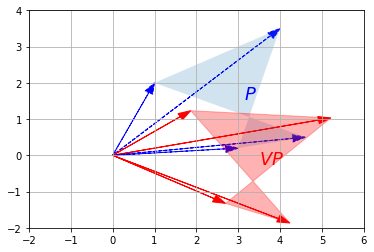

In [93]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

_Matrix $V$ is called a **rotation matrix**._

##### Matrix multiplication – Other linear transformations
_More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:_

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

_and $f$ is defined as:_

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

_This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:_

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

_Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:_
$f(\textbf{u}) = F \textbf{u}$

_If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:_

$FG = \begin{bmatrix}f(\textbf{u}_1) &amp; f(\textbf{u}_2) &amp; \cdots &amp; f(\textbf{u}_q) \end{bmatrix}$

_To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a shear mapping:_

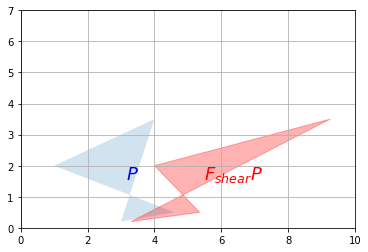

In [94]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

_Let's look at how this transformation affects the **unit square**:_

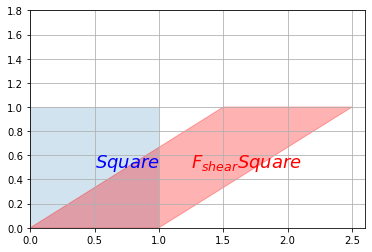

In [95]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

_Now let's look at a **squeeze mapping**:_

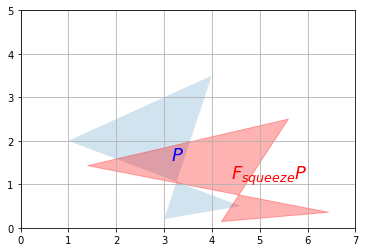

In [96]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

_The effect on the unit square is:_

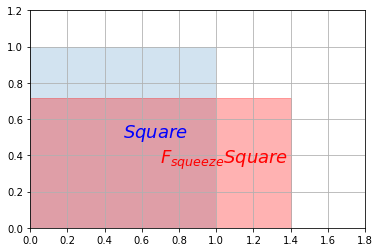

In [97]:
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

_Let's show a last one: reflection through the horizontal axis:_

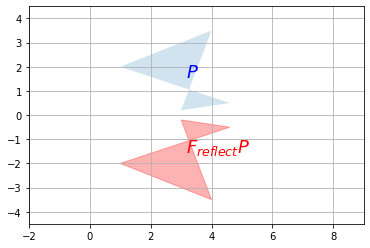

In [98]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{reflect} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

#### Matrix inverse
_Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? The answer is yes… sometimes! When it exists, such a matrix is called the **inverse** of $F$, and it is noted $F^{-1}$._

_For example, the rotation, the shear mapping and the squeeze mapping above all have inverse transformations. Let's demonstrate this on the shear mapping:_

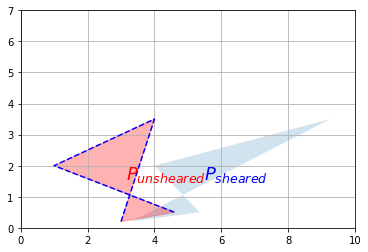

In [99]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

_We applied a shear mapping on $P$, just like we did before, but then we applied a second transformation to the result, and lo and behold this had the effect of coming back to the original $P$ (we plotted the original $P$'s outline to double check). The second transformation is the inverse of the first one._

_We defined the inverse matrix $F_{shear}^{-1}$ manually this time, but NumPy provides an `inv` function to compute a matrix's inverse, so we could have written instead:_

In [100]:
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

_Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. For example say you use a $2 \times 3$ matrix to project a 3D object onto a plane. The result may look like this:_

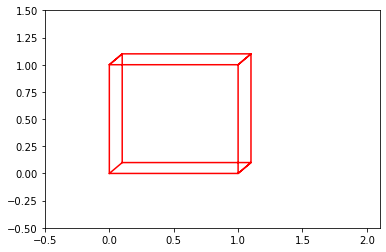

In [101]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

_Looking at this image, it is impossible to tell whether this is the projection of a cube or the projection of a narrow rectangular object. Some information has been lost in the projection._

_Even square transformation matrices can lose information. For example, consider this transformation matrix:_

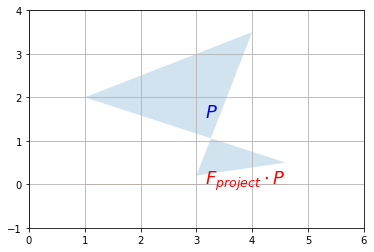

In [102]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

_This transformation matrix performs a projection onto the horizontal axis. Our polygon gets entirely flattened out so some information is entirely lost and it is impossible to go back to the original polygon using a linear transformation. In other words, $F_{project}$ has no inverse. Such a square matrix that cannot be inversed is called a **singular matrix** (aka degenerate matrix). If we ask NumPy to calculate its inverse, it raises an exception:_

In [103]:
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


_Here is another example of a singular matrix. This one performs a projection onto the axis at a 30° angle above the horizontal axis:_

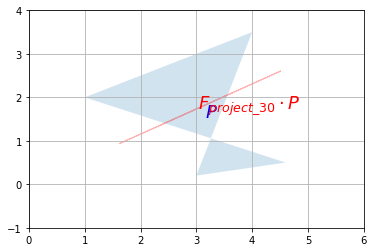

In [104]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30.dot(P), "$P$", "$F_{project\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

_But this time, due to floating point rounding errors, NumPy manages to calculate an inverse (notice how large the elements are, though):_

In [105]:
LA.inv(F_project_30)

array([[ 1.54810441e+16, -2.68139549e+16],
       [-2.68139549e+16,  4.64431323e+16]])

_As you might expect, the dot product of a matrix by its inverse results in the identity matrix:_

$M \cdot M^{-1} = M^{-1} \cdot M = I$

_This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all._

In [106]:
F_shear.dot(LA.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

_Another way to express this is that the inverse of the inverse of a matrix $M$ is $M$ itself:_

$((M)^{-1})^{-1} = M$

In [107]:
LA.inv(LA.inv(F_shear))

array([[1. , 1.5],
       [0. , 1. ]])

_Also, the inverse of scaling by a factor of $\lambda$ is of course scaling by a factor or $\frac{1}{\lambda}$:_

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

_Once you understand the geometric interpretation of matrices as linear transformations, most of these properties seem fairly intuitive._

_A matrix that is its own inverse is called an **involution**. The simplest examples are reflection matrices, or a rotation by 180°, but there are also more complex involutions, for example imagine a transformation that squeezes horizontally, then reflects over the vertical axis and finally rotates by 90° clockwise. Pick up a napkin and try doing that twice: you will end up in the original position. Here is the corresponding involutory matrix:_

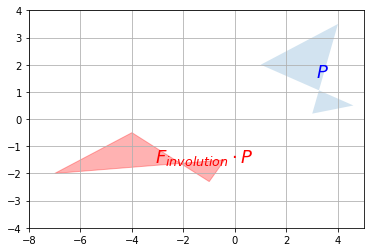

In [108]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

_Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:_

$H^{-1} = H^T$

_Therefore:_

$H \cdot H^T = H^T \cdot H = I$

_It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not rescaling, shearing or squeezing. Let's check that $F_{reflect}$ is indeed orthogonal:_

In [109]:
F_reflect.dot(F_reflect.T)

array([[1, 0],
       [0, 1]])

#### Determinant
_The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:_

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

_Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$._

_For example, let's calculate the determinant of the following $3 \times 3$ matrix:_

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

_Using the method above, we get:_

$|M| =$ $1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
 - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
 + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

_Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):_

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

_Now we can calculate the final result:_
$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

_To get the determinant of a matrix, you can call NumPy's `det` function in the `numpy.linalg` module:_

In [110]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

_One of the main uses of the determinant is to $\textit{determine}$ whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix cannot be inversed (it is a singular matrix), and if the determinant is not 0, then it can be inversed._

_For example, let's compute the determinant for the $F_{project}$, $F_{project\_30}$ and $F_{shear}$ matrices that we defined earlier:_

In [111]:
LA.det(F_project)

0.0

_That's right, $F_{project}$ is singular, as we saw earlier._

In [112]:
LA.det(F_project_30)

1.6148781609251353e-17

_This determinant is suspiciously close to 0: it really should be 0, but it's not due to tiny floating point errors. The matrix is actually singular._

In [113]:
LA.det(F_shear)

1.0

_Perfect! This matrix can be inversed as we saw earlier. Wow, math really works!_

_The determinant can also be used to measure how much a linear transformation affects surface areas: for example, the projection matrices $F_{project}$ and $F_{project\_30}$ completely flatten the polygon $P$, until its area is zero. This is why the determinant of these matrices is 0. The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:_

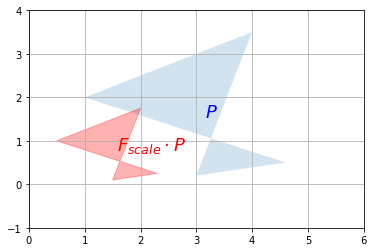

In [114]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

_We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4$^{th}$ of the original polygon. Let's compute the determinant and check that:_

In [115]:
LA.det(F_scale)

0.25

_Correct!_

_The determinant can actually be negative, when the transformation results in a "flipped over" version of the original polygon (eg. a left hand glove becomes a right hand glove). For example, the determinant of the `F_reflect` matrix is -1 because the surface area is preserved but the polygon gets flipped over:_

In [116]:
LA.det(F_reflect)

-1.0

#### Composing linear transformations
_Several linear transformations can be chained simply by performing multiple dot products in a row. For example, to perform a squeeze mapping followed by a shear mapping, just write:_

In [117]:
P_squeezed_then_sheared = F_shear.dot(F_squeeze.dot(P))

_Since the dot product is associative, the following code is equivalent:_

In [118]:
P_squeezed_then_sheared = (F_shear.dot(F_squeeze)).dot(P)

_Note that the order of the transformations is the reverse of the dot product order._

_If we are going to perform this composition of linear transformations more than once, we might as well save the composition matrix like this:_

In [119]:
F_squeeze_then_shear = F_shear.dot(F_squeeze)
P_squeezed_then_sheared = F_squeeze_then_shear.dot(P)

_From now on we can perform both transformations in just one dot product, which can lead to a very significant performance boost._

_What if you want to perform the inverse of this double transformation? Well, if you squeezed and then you sheared, and you want to undo what you have done, it should be obvious that you should unshear first and then unsqueeze. In more mathematical terms, given two invertible (aka nonsingular) matrices $Q$ and $R$:_

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

_And in NumPy:_

In [120]:
LA.inv(F_shear.dot(F_squeeze)) == LA.inv(F_squeeze).dot(LA.inv(F_shear))

array([[ True,  True],
       [ True,  True]])

#### Singular Value Decomposition
_It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:_
* _a rotation matrix $U$ (an $m \times m$ orthogonal matrix)_
* _a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)_
* _and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)_

$M = U \cdot \Sigma \cdot V^{T}$

_For example, let's decompose the shear transformation:_

In [121]:
U, S_diag, V_T = LA.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [122]:
S_diag

array([2. , 0.5])

_Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:_

In [123]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

_Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to `F_shear`:_

In [124]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[1. , 1.5],
       [0. , 1. ]])

In [125]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

_It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:_

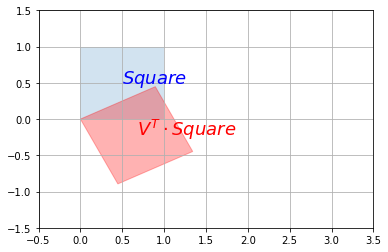

In [126]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

_Now let's rescale along the vertical and horizontal axes using $\Sigma$:_

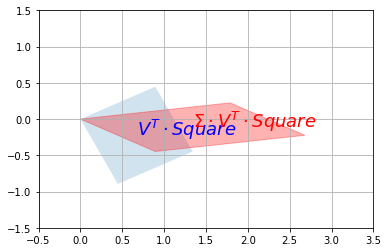

In [127]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

_Finally we apply the second rotation $U$:_

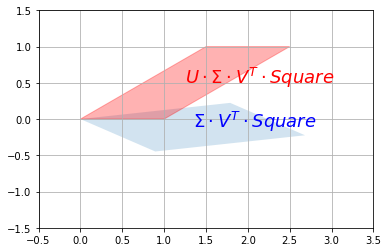

In [128]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

_And we can see that the result is indeed a shear mapping of the original unit square._

#### Eigenvectors and eigenvalues
_An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:_

$M \cdot v = \lambda \times v$

_Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$._

_For example, any horizontal vector remains horizontal after applying the shear mapping (as you can see on the image above), so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are NOT eigenvectors of $M$._

_If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.
However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors)._

_NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. Let's look at the eigenvectors and eigenvalues of the squeeze mapping matrix $F_{squeeze}$:_

In [129]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [130]:
eigenvectors # [v0, v1, …]

array([[1., 0.],
       [0., 1.]])

_Indeed the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714…, so far so good. Let's look at the shear mapping matrix $F_{shear}$:_

In [131]:
eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2 # [λ0, λ1, …]

array([1., 1.])

In [132]:
eigenvectors2 # [v0, v1, …]

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

_Wait, what!? We expected just one unit eigenvector, not two. The second vector is almost equal to $\begin{pmatrix}-1 \\ 0 \end{pmatrix}$, which is on the same line as the first vector $\begin{pmatrix}1 \\ 0 \end{pmatrix}$. This is due to floating point errors. We can safely ignore vectors that are (almost) colinear (ie. on the same line)._

#### Trace
_The trace of a square matrix $M$, noted $tr(M)$ is the sum of the values on its main diagonal. For example:_

In [133]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
np.trace(D)

123

_The trace does not have a simple geometric interpretation (in general), but it has a number of properties that make it useful in many areas:_
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
* …

_It does, however, have a useful geometric interpretation in the case of projection matrices (such as $F_{project}$ that we discussed earlier): it corresponds to the number of dimensions after projection. For example:_

In [134]:
np.trace(F_project)

1

### What next?
_This concludes this introduction to Linear Algebra. Although these basics cover most of what you will need to know for Machine Learning, if you wish to go deeper into this topic there are many options available: Linear Algebra [books](http://linear.axler.net/), [Khan Academy](https://www.khanacademy.org/math/linear-algebra) lessons, or just [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra) pages._

## Credits
This assignment was prepared by P. Nugues et al., HT2019 (link [here](https://web.archive.org/web/20200111075034/http://cs.lth.se/edan95/lab-programming-assignments/lab-session-1/)).

Exercises and code are from the `math_linear_algebra.ipynb` notebook in _Machine Learning and Deep Learning in Python using Scikit-learn, Keras and TensorFlow 2_ (A. Géron), available here: https://github.com/ageron/handson-ml2.